In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


# ***Data Overview***
- The dataset contains 5244 entries with 12 columns.
All columns have non-null values, and all data types are integers.

In [2]:
eeg_data = pd.read_csv("C:/Users/tomas/Desktop/Warsztat-Ai/warsztat-ai/datasets/autentykacja_eeg.csv",delimiter=";")
eeg_data.head()

,Delta,Theta,Alpha_low,Alpha_high,Beta_low,Beta_high,Gamma_low,Gamma_high,Attention,Meditation,BlinkStrength,Flag
0,785389,114375,57106,37625,24464,17104,15846,8024,45,91,15,1
1,386949,80792,23506,22118,9566,7147,5392,1697,8,42,6,0
2,21453,14085,4756,5062,2176,2117,2867,862,48,66,9,1
3,322637,56936,17810,25793,15870,8050,3621,2100,25,69,8,0
4,19412,12985,6416,6131,7126,7419,2677,1884,80,53,-1,1


In [3]:
eeg_data.describe()

,Delta,Theta,Alpha_low,Alpha_high,Beta_low,Beta_high,Gamma_low,Gamma_high,Attention,Meditation,BlinkStrength,Flag
count,5.244000e+03,5244.000000,5244.000000,5244.000000,5244.000000,5244.000000,5244.000000,5244.000000,5244.000000,5244.000000,5244.000000,5244.000000
mean,3.090832e+05,63344.774981,15912.476735,13478.048818,10837.555873,8553.934973,6003.355263,2987.525934,51.652365,58.632151,11.547292,0.601068
std,3.095886e+05,65368.306706,16146.452270,12358.799228,10751.971186,8084.039432,5821.807357,2820.326823,16.511836,15.025158,14.779718,0.489725
min,4.584000e+03,4307.000000,1417.000000,1223.000000,1104.000000,1181.000000,558.000000,251.000000,1.000000,1.000000,-1.000000,0.000000
25%,7.401125e+04,24484.250000,6686.000000,6461.750000,5439.000000,4510.000000,2676.750000,1402.000000,40.000000,49.000000,-1.000000,0.000000
50%,1.933350e+05,40572.000000,10867.000000,9740.000000,8004.000000,6598.000000,4307.000000,2160.000000,52.000000,59.000000,8.000000,1.000000
75%,4.655525e+05,79836.000000,18803.000000,16006.750000,12370.250000,9852.000000,7239.750000,3526.000000,63.000000,69.000000,18.000000,1.000000
max,1.840855e+06,690442.000000,168356.000000,149180.000000,167349.000000,173909.000000,66565.000000,27786.000000,100.000000,99.000000,100.000000,1.000000


In [4]:
eeg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5244 entries, 0 to 5243
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Delta          5244 non-null   int64
 1   Theta          5244 non-null   int64
 2   Alpha_low      5244 non-null   int64
 3   Alpha_high     5244 non-null   int64
 4   Beta_low       5244 non-null   int64
 5   Beta_high      5244 non-null   int64
 6   Gamma_low      5244 non-null   int64
 7   Gamma_high     5244 non-null   int64
 8   Attention      5244 non-null   int64
 9   Meditation     5244 non-null   int64
 10  BlinkStrength  5244 non-null   int64
 11  Flag           5244 non-null   int64
dtypes: int64(12)
memory usage: 491.8 KB


 # ***Data Vizualization***
- Distributions (Understanding the distribution helps identify potential outliers and assess the need for normalization or transformation)
- Correlation ( helps identify potential associations)
- Pairwise Scatter Plots (to see relationships between pairs of variables, Differentiating points by 'Flag' allows for insights into potential patterns or separations between the classes )
- Box plots (to see distribution of each feature grouped by Flags)

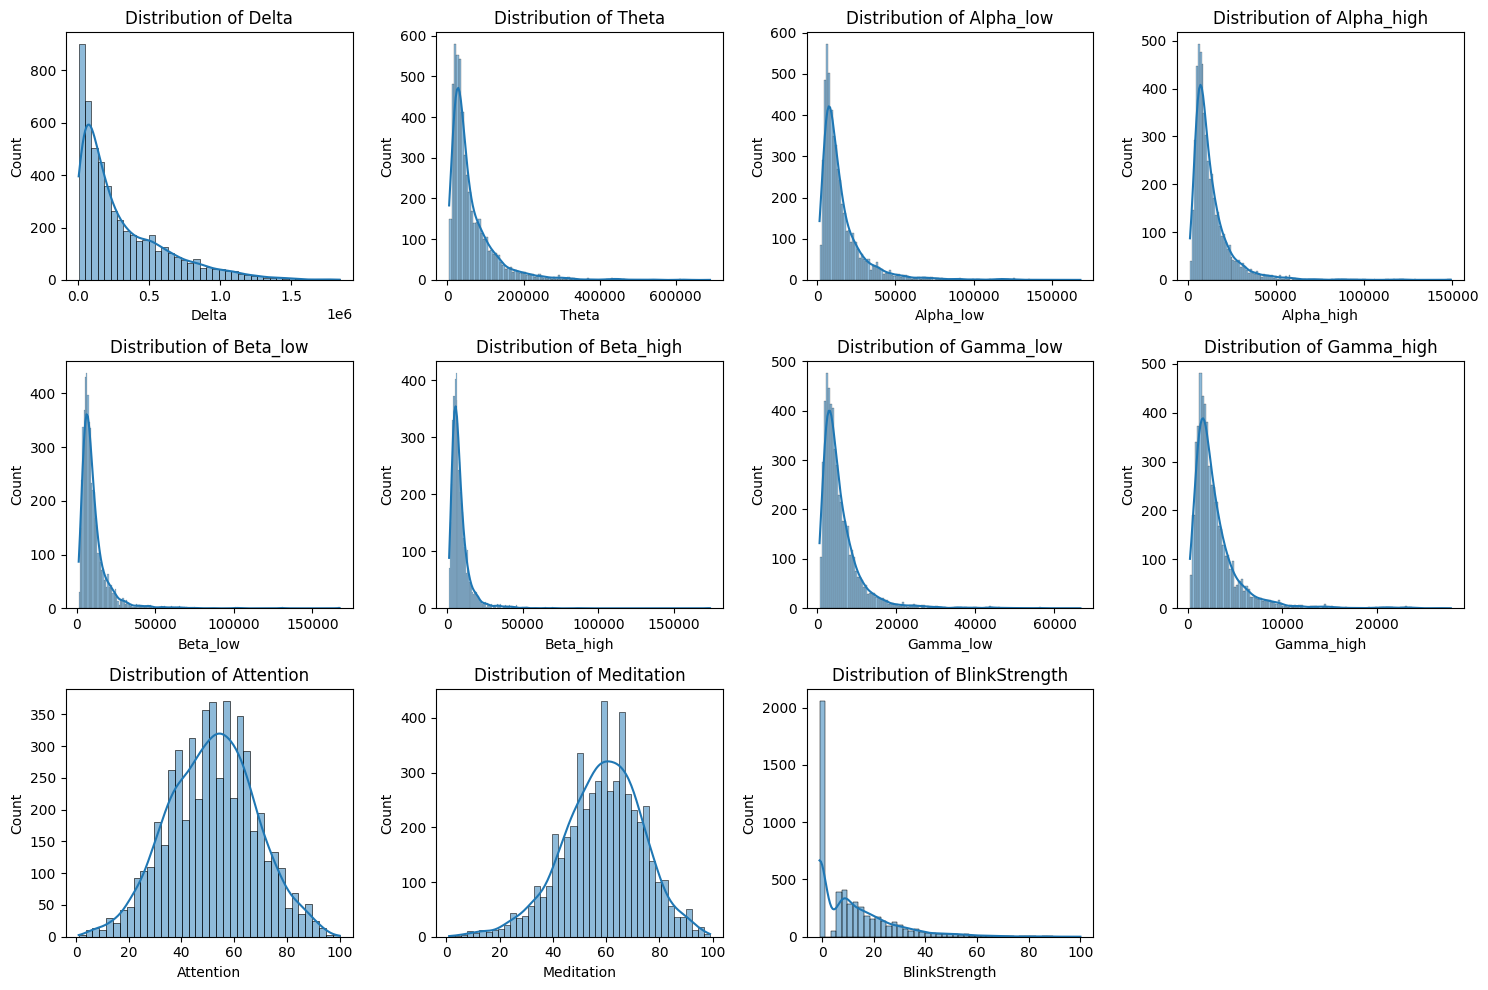

In [5]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(eeg_data.columns[:-1]):
    plt.subplot(3, 4, i + 1)
    sns.histplot(eeg_data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

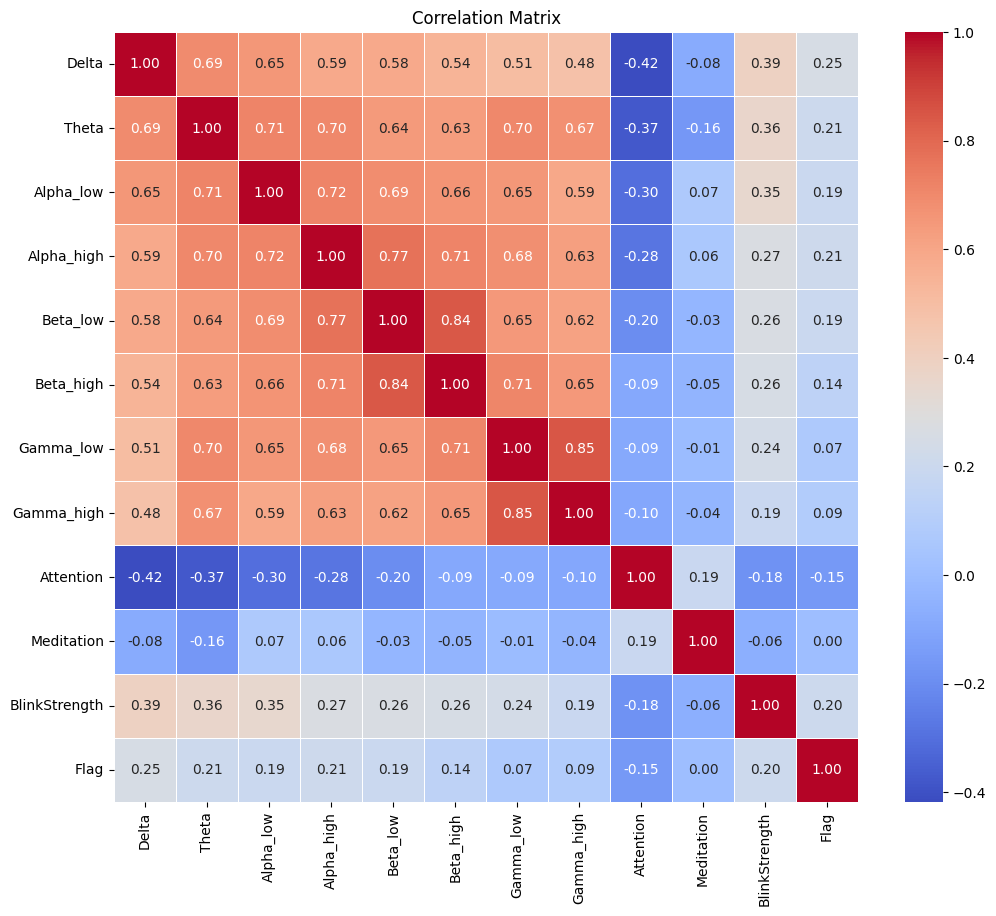

In [6]:
correlation_matrix = eeg_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

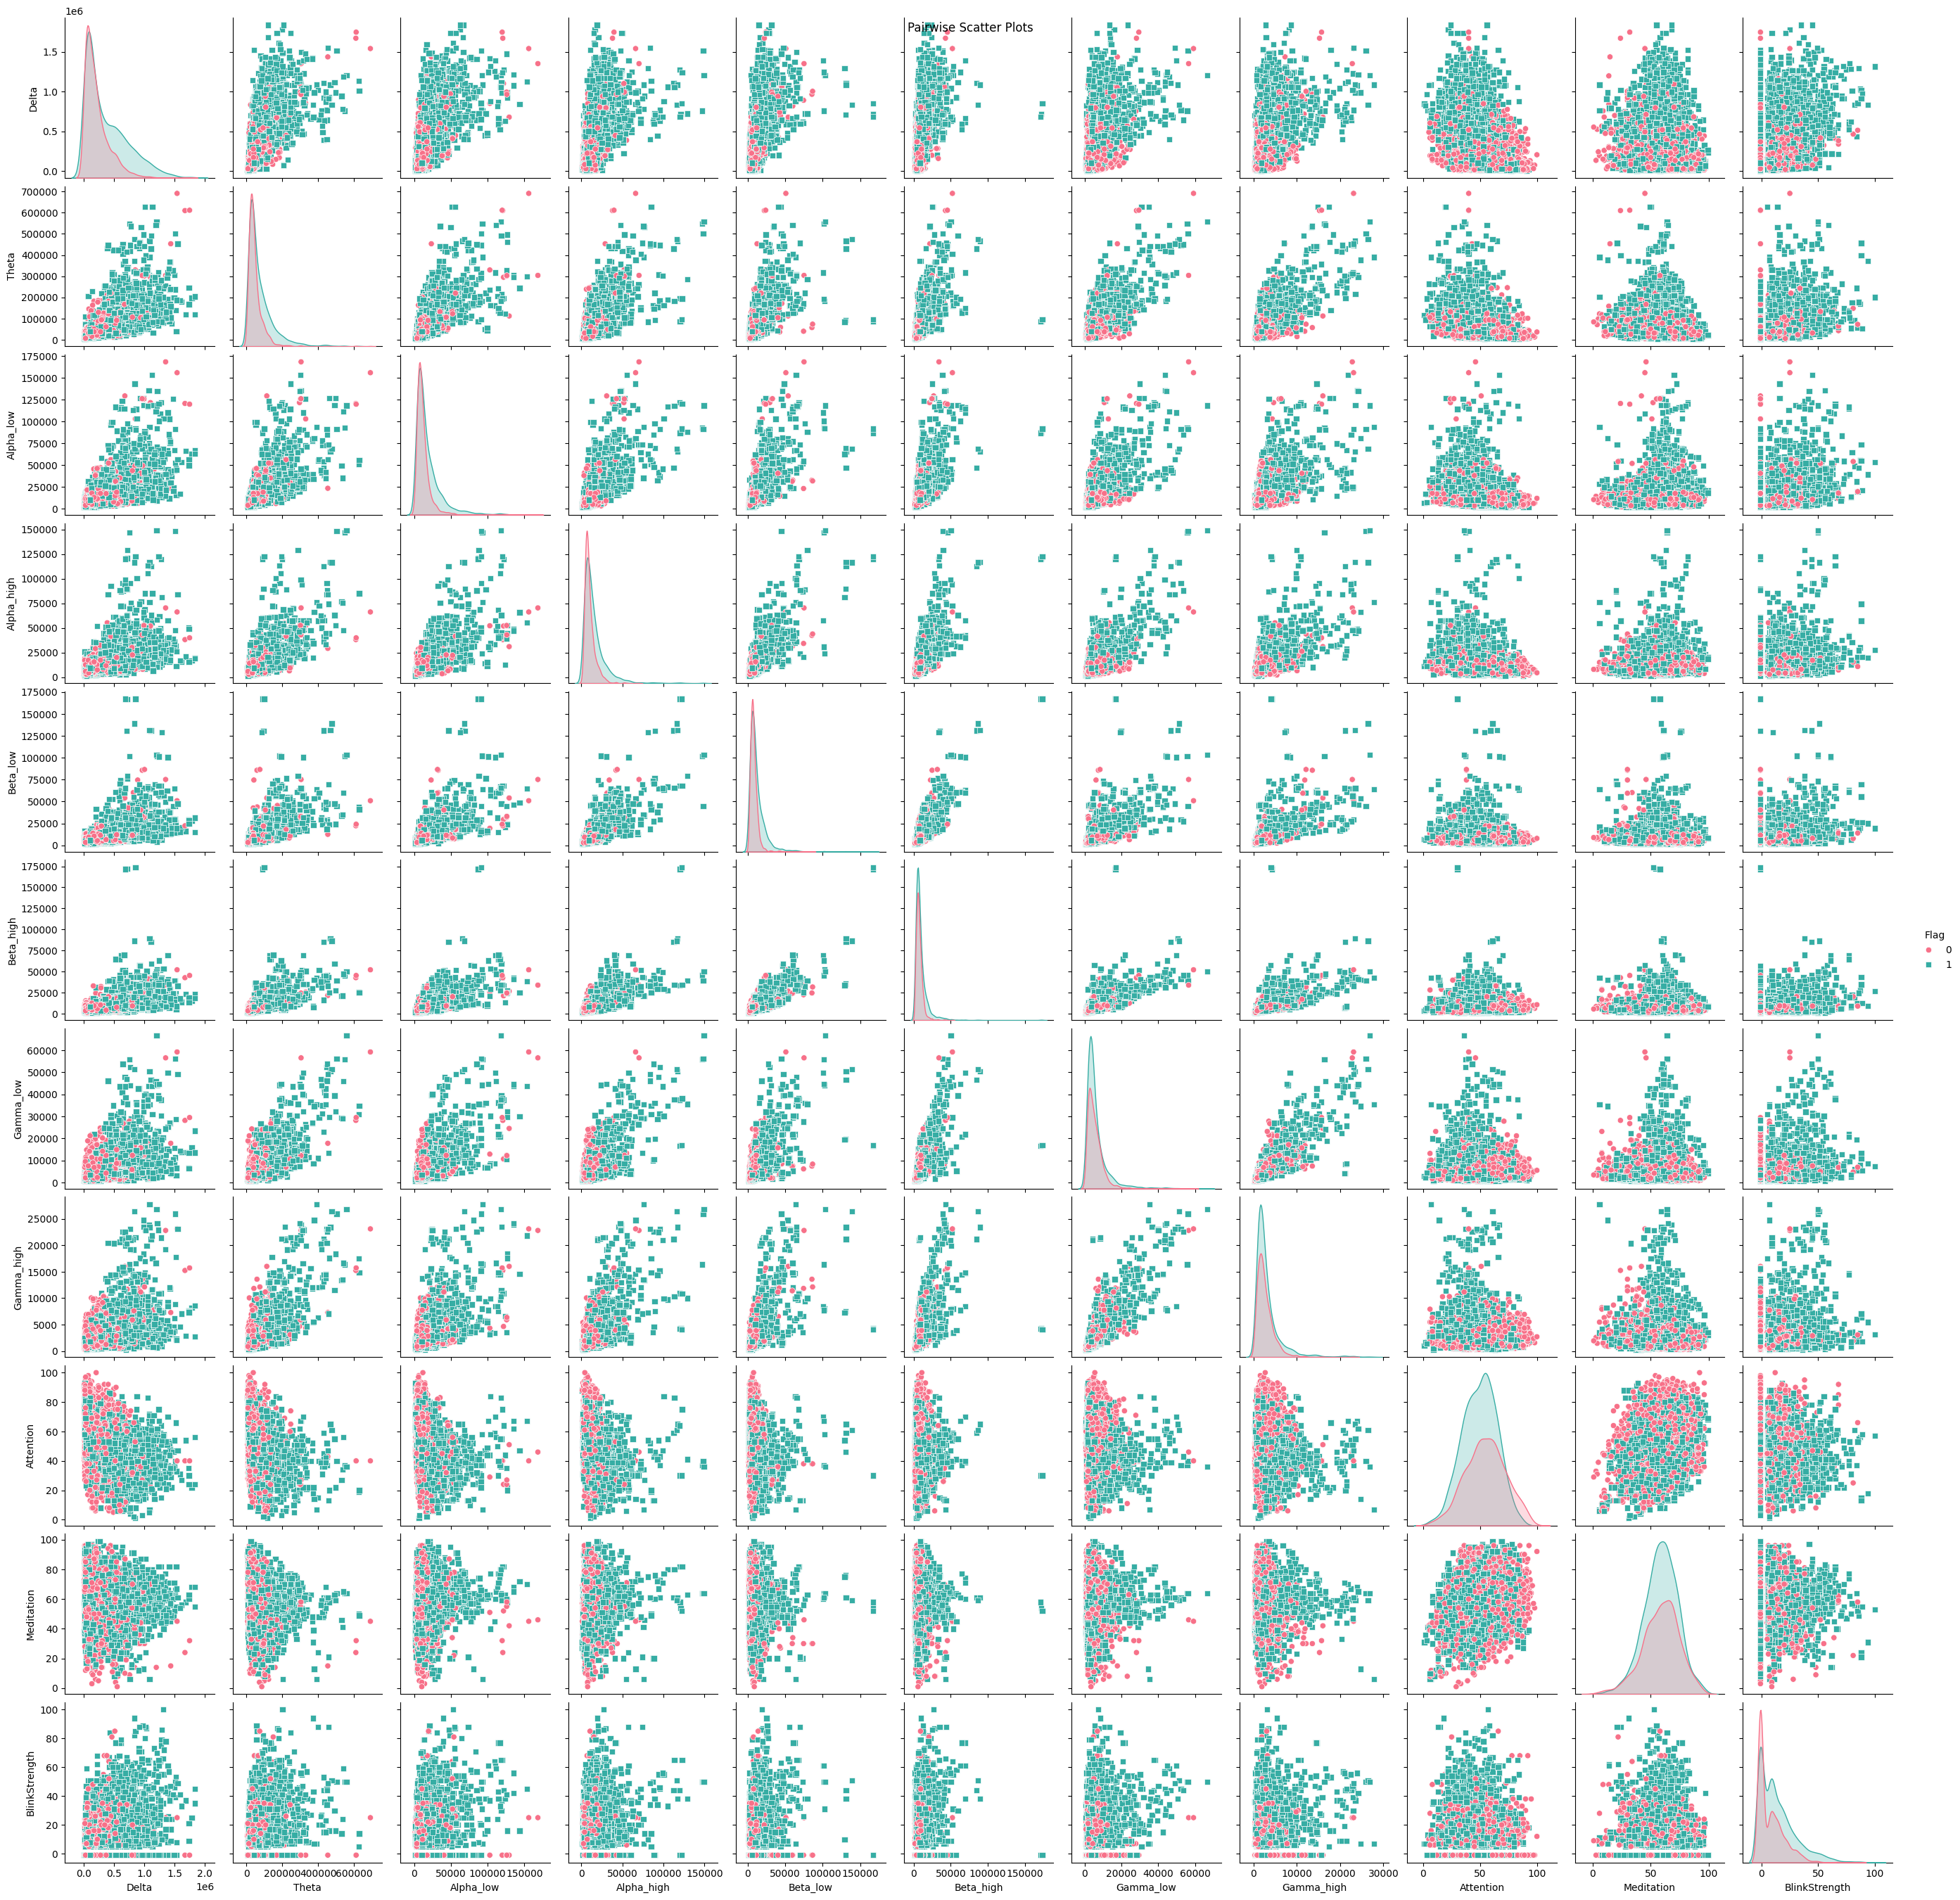

In [7]:
sns.pairplot(eeg_data[ ["Flag", 'Delta', 'Theta', 'Alpha_low', 'Alpha_high', 'Beta_low', 'Beta_high',
       'Gamma_low', 'Gamma_high', 'Attention', 'Meditation', 'BlinkStrength']], hue='Flag', markers=["o", "s"], palette="husl")
plt.suptitle('Pairwise Scatter Plots')
plt.show()

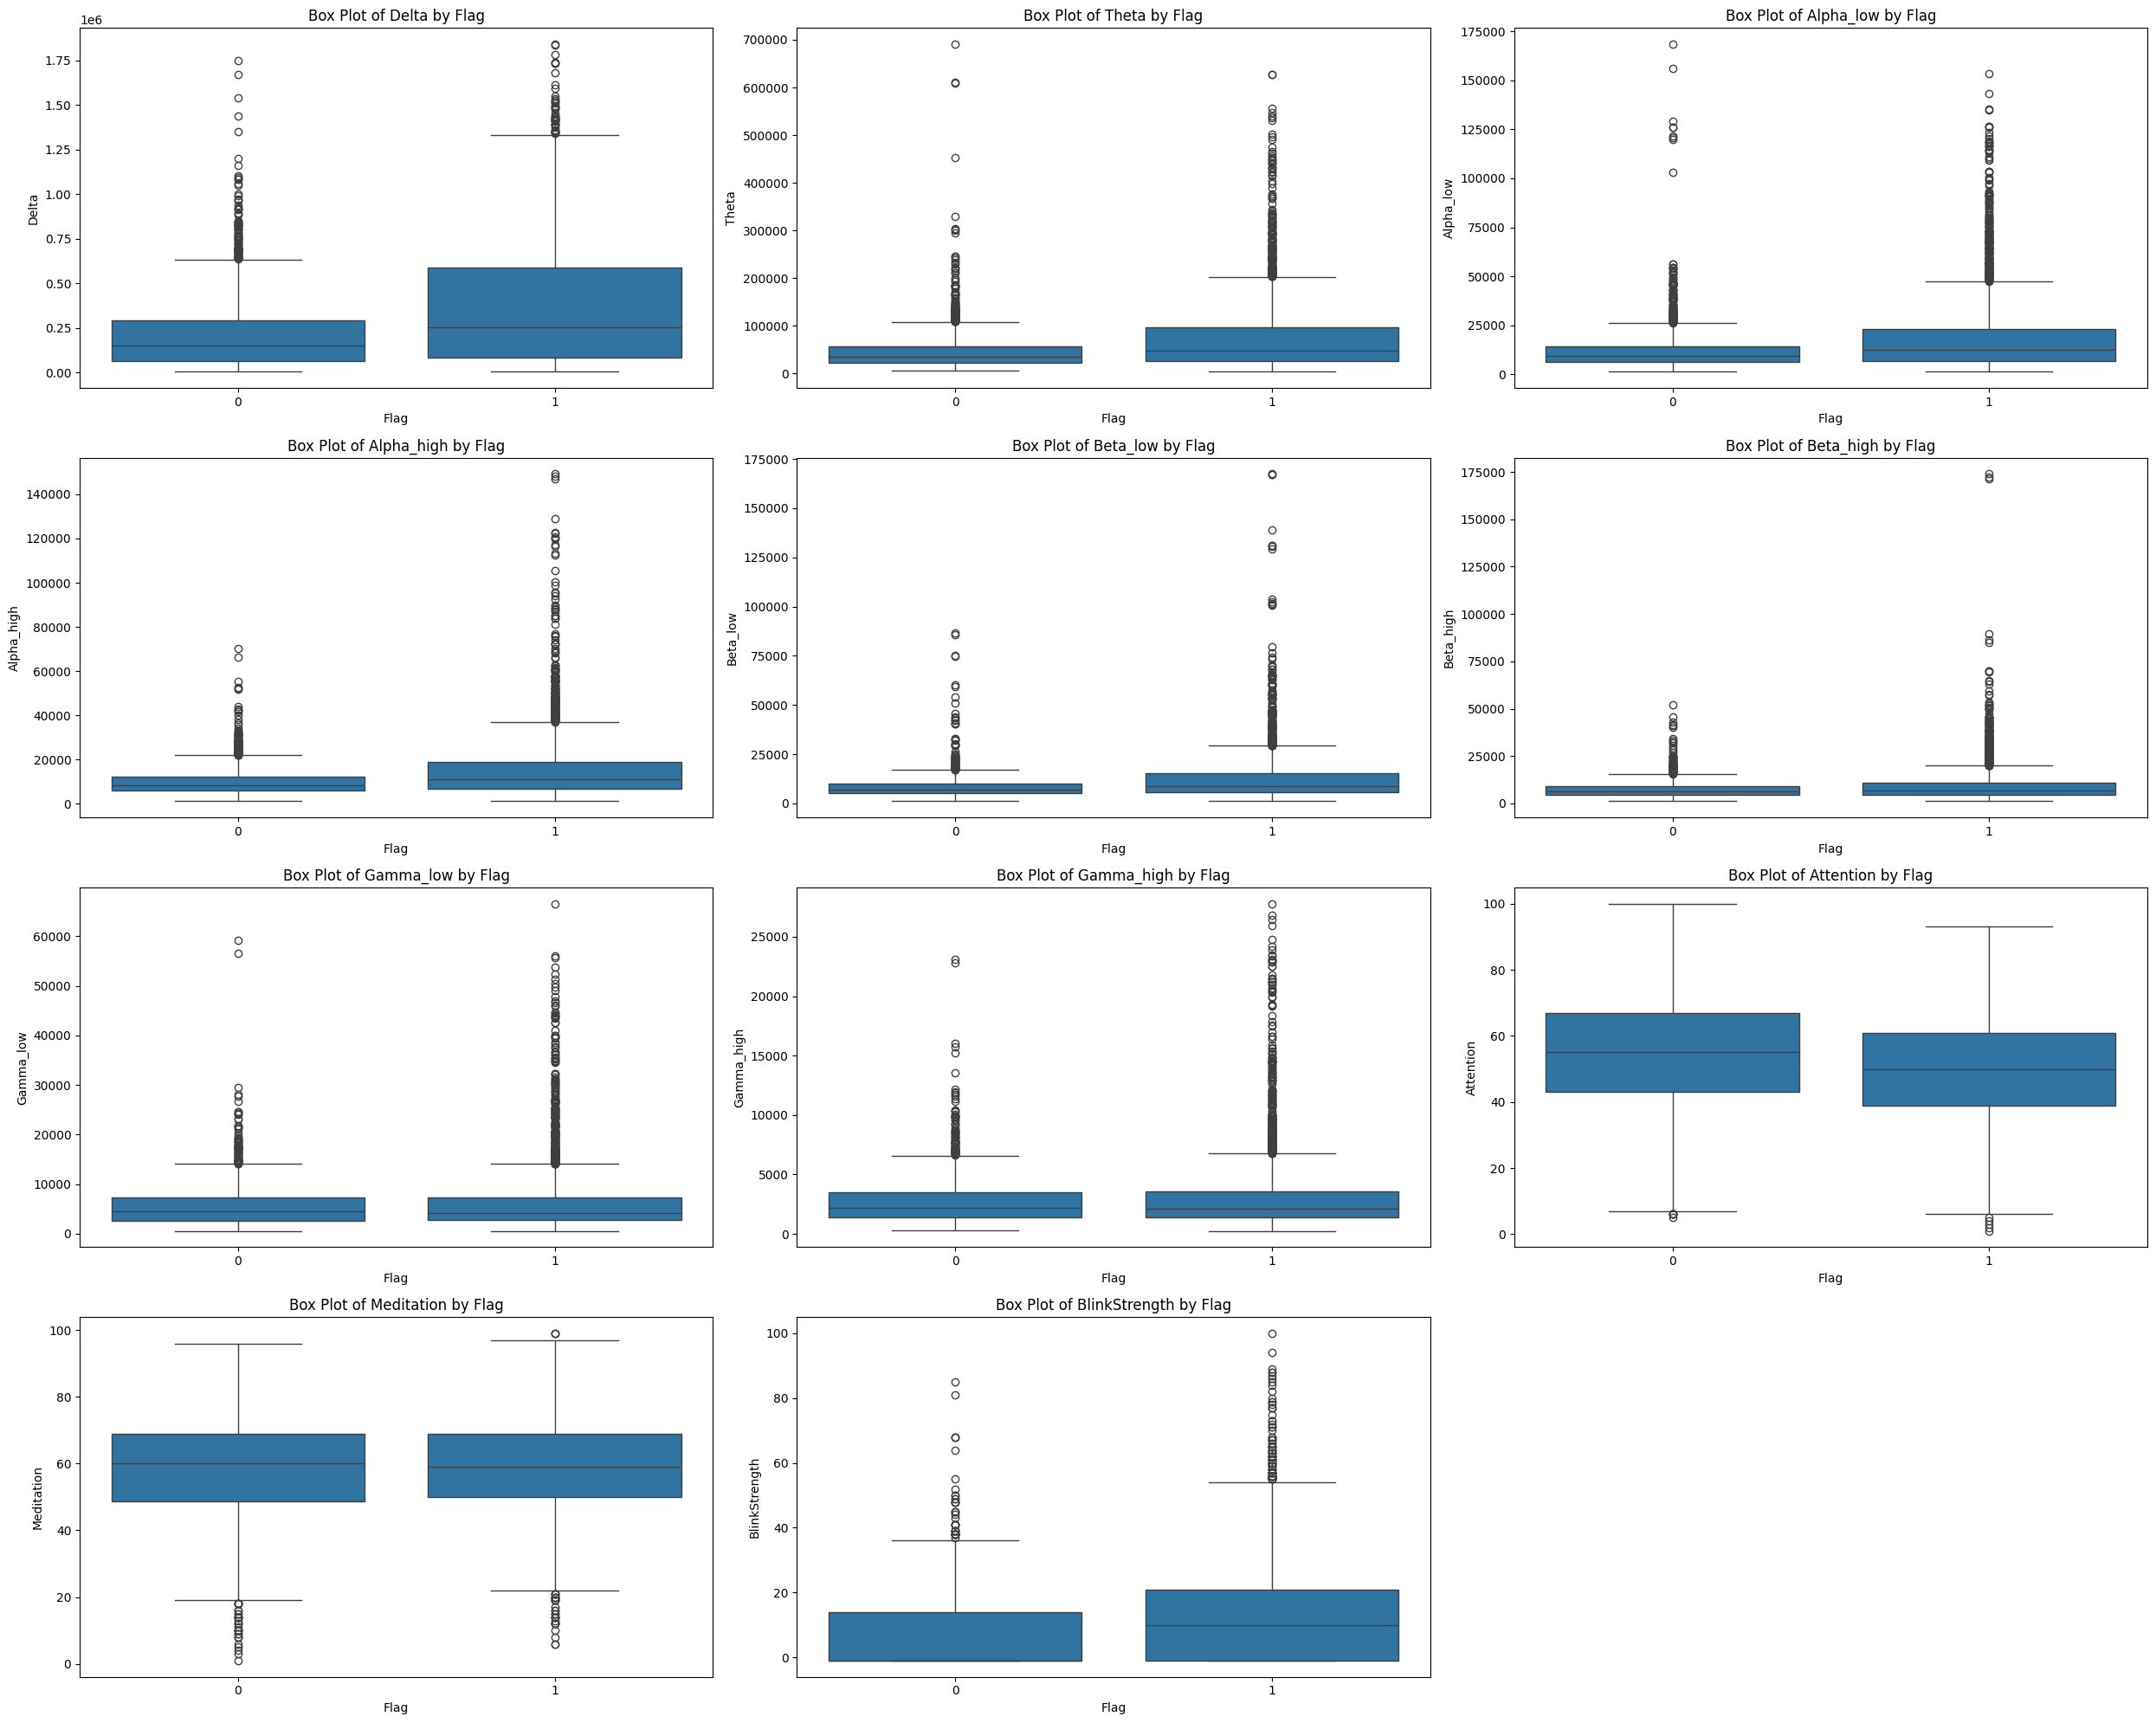

In [8]:
plt.figure(figsize=(25, 20))
selected_features =  ['Delta', 'Theta', 'Alpha_low', 'Alpha_high', 'Beta_low', 'Beta_high',
       'Gamma_low', 'Gamma_high', 'Attention', 'Meditation', 'BlinkStrength']
for i, feature in enumerate(selected_features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='Flag', y=feature, data=eeg_data)
    plt.title(f'Box Plot of {feature} by Flag')
plt.tight_layout()
plt.show()